# <img style="float: left; padding-right: 10px; width: 45px" src="https://github.com/Harvard-IACS/2018-CS109A/blob/master/content/styles/iacs.png?raw=true"> CS109A Introduction to Data Science 


## Lab 5:  Exploratory Data Analysis, `seaborn`, more Plotting

**Harvard University**<br>
**Fall 2019**<br>
**Instructors:** Pavlos Protopapas, Kevin Rader, and Chris Tanner<br>
**Material Preparation:** Eleni Kaxiras.

---

In [1]:
#RUN THIS CELL 
import requests
from IPython.core.display import HTML
styles = requests.get("https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css").text
HTML(styles)

In [2]:
# import the necessary libraries
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import time
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 200)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')
%config InlineBackend.figure_format ='retina'

In [3]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

## Learning Goals

By the end of this lab, you should be able to:
- know how to implement the different types of plots such as histograms, boxplots, etc, that were mentioned in class.
- have `seaborn` as well as `matplotlib` in your plotting toolbox.

**This lab corresponds to lecture 6 up to 9 and maps to homework 3.**

## Table of Contents

* [1 - Visualization Inspiration](#inspire)

* [2 - Intro to `seaborn` plotting](#seaborn)

* [3 - Different types of plots (histograms, boxplots, etc)](#plots)

* [4 - Excercise: EDA on Medical Data](#exercise)

<a class="anchor" id="inspire"></a>
## 1 - Visualization Inspiration

![title](../images/WGOITG.jpg)

[source: nytimes.org](https://www.nytimes.com/2018/08/27/learning/whats-going-on-in-this-graph-is-now-weekly-stem-teachers-explain-why-its-a-powerful-activity.html)

Notice that in “Summers Are Getting Hotter,” above, the histogram has intervals for global summer temperatures on the x-axis, designated from extremely cold to extremely hot, and their frequency on the y-axis. 

That was an **infographic** intended for the general public. In contrast, take a look at the plots below of the same data published at a **scientific journal**. They look quite different, don't they?

![title](../images/F4.jpeg)

*James Hansen, Makiko Sato, and Reto Ruedy*, Perception of climate change. [PNAS](https://www.pnas.org/content/109/37/E2415.full#abstract-1)

<a class="anchor" id="seaborn"></a>
## 2 - Implementing Various Types of Plots using `matplotlib`  and `seaborn`.

Before you start coding your visualization, you need to decide what **type** of vizualization to use. A box plot, a histogram, a scatter plot, or something else? That will depend on the purpose of the plot (is it for performing an inspection on your data (EDA, or for showing your results/conclusions to people) and the number variables that you want to plot.

You have a lot of tools for plotting in Python. The basic one, of course, is `matplotlib` and there are other libraries that are built on top of it, such as `seaborn`, `bokeh`, or `altair`. 

In this class we will continue using `matplotlib` and also look into [`seaborn`](https://seaborn.pydata.org). Those two libraries are the ones you should be using for homework.

### Introduction to `seaborn`

`Seaborn` is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics. The library provides a database of useful datasets for educational purposes that can be loaded by typing:

```python
seaborn.load_dataset(name, cache=True, data_home=None, **kws)
```

For information on what these datasets are : https://github.com/mwaskom/seaborn-data

#### The plotting functions in `seaborn` can be decided in two categories

- **'axes-level'** functions, such as `regplot`, `boxplot`, `kdeplot`, `scatterplot`, `distplot` which can connect with the `matplotlib` Axes object and its parameters. You can use that object as you would in `matplotlib`:
```python
f, (ax1, ax2) = plt.subplots(2)
sns.regplot(x, y, ax=ax1)
sns.kdeplot(x, ax=ax2)
ax1 = sns.distplot(x, kde=False, bins=20)
```

- **'figure-level'** functions, such as `lmplot`, `factorplot`, `jointplot`, `relplot`. In this case, `seaborn` organizes the resulting plot which may include several Axes in a meaningful way. That means that the functions need to have total control over the figure, so it isn't possible to plot, say, an `lmplot` onto one that already exists. Calling the function always initializes a figure and sets it up for the specific plot it's drawing. These functions return an object of the type `FacetGrid` with its own methods for operating on the resulting plot.

To set the parameters for figure-level functions:

```python
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2.5})
```

### The Titanic dataset

The `titanic.csv` file contains data for 887 passengers on the Titanic. Each row represents one person. The columns describe different attributes about the person including whether they survived, their age, their on-board class, their sex, and the fare they paid. 

In [ ]:
titanic = sns.load_dataset('titanic');
titanic.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
fare           891 non-null float64
embarked       889 non-null object
class          891 non-null category
who            891 non-null object
adult_male     891 non-null bool
deck           203 non-null category
embark_town    889 non-null object
alive          891 non-null object
alone          891 non-null bool
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [ ]:
titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone'], dtype='object')

<div class='exercise'> <b> Exercise:  Drop the following features:</div>
    
'embarked', 'who', 'adult_male', 'embark_town', 'alive', 'alone' 

In [6]:
# your code here
# your code here
columns = ['embarked', 'who', 'adult_male', 'embark_town', 'alive', 'alone']
titanic = titanic.drop(columns=columns)
titanic

,survived,pclass,sex,age,sibsp,parch,fare,class,deck
0,0,3,male,22.0,1,0,7.2500,Third,NaN
1,1,1,female,38.0,1,0,71.2833,First,C
2,1,3,female,26.0,0,0,7.9250,Third,NaN
3,1,1,female,35.0,1,0,53.1000,First,C
4,0,3,male,35.0,0,0,8.0500,Third,NaN
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,Second,NaN
887,1,1,female,19.0,0,0,30.0000,First,B
888,0,3,female,NaN,1,2,23.4500,Third,NaN
889,1,1,male,26.0,0,0,30.0000,First,C


<div class='exercise'> <b> Exercise:  Find for how many passengeres we do not have their deck information.</div>

In [7]:
# your code here
# your code here
missing_decks = len(titanic[(pd.isna(titanic['deck']) == True)])
missing_decks

688

### Histograms

#### Plotting one variable's distribution (categorical and continous)
The most convenient way to take a quick look at a univariate distribution in `seaborn` is the `distplot()` function. By default, this will draw a histogram and fit a kernel density estimate (KDE).

A histogram displays a quantitative (numerical) distribution by showing the number (or percentage) of the data values that fall in specified intervals. The intervals are on the x-axis and the number of values falling in each interval, shown as either a number or percentage, are represented by bars drawn above the corresponding intervals.

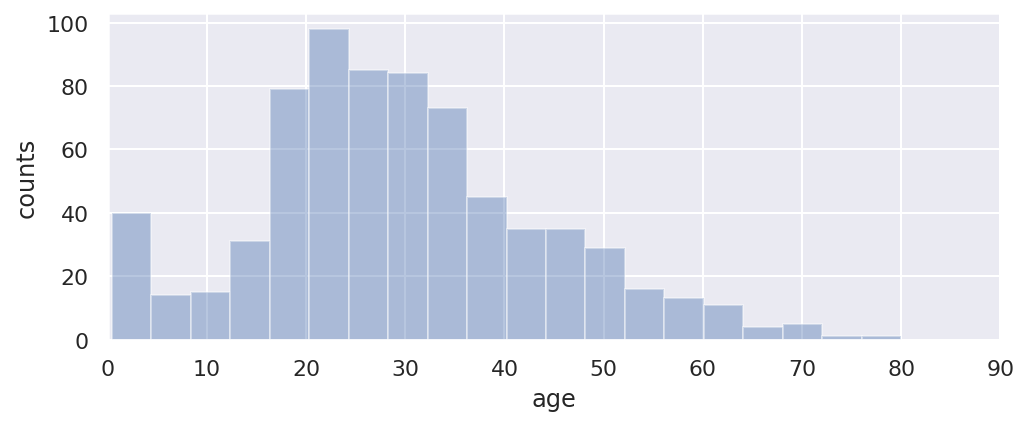

In [8]:
# What was the age distribution among passengers in the Titanic?
import seaborn as sns
sns.set(color_codes=True)

f, ax = plt.subplots(1,1, figsize=(8, 3));
ax = sns.distplot(titanic.age, kde=False, bins=20)

# bug
#ax = sns.distplot(titanic.age, kde=False, bins=20).set(xlim=(0, 90));

ax.set(xlim=(0, 90));
ax.set_ylabel('counts');

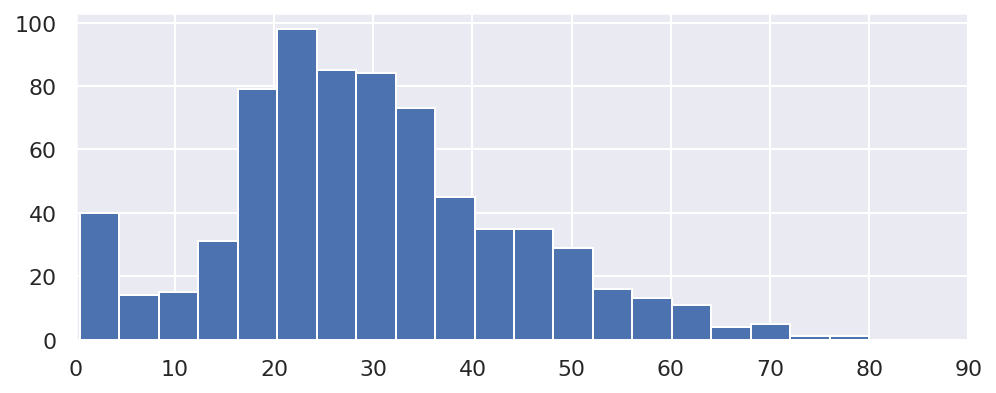

In [9]:
f, ax = plt.subplots(1,1, figsize=(8, 3))
ax.hist(titanic.age, bins=20);
ax.set_xlim(0,90);

<div class='exercise'> <b> Exercise (pandas trick): Count all the infants on board (age less than 3) and all the children ages 5-10.</div>

In [10]:
# your code here
infants = len(titanic[(titanic.age < 3)]) 
children = len(titanic[(titanic.age >= 3) & (titanic.age < 10)]) 
print(f'There were {infants} infants and {children} children on board the Titanic')

There were 24 infants and 38 children on board the Titanic


**Pandas trick:** We want to creat virtual "bins" for readability and replace ranges of values with categories. 

We will do this in an ad hoc way, **it can be done better**. For example in the previous plot we could set:
    
- `(age<3) = 'infants'`, 
- `(3<age<18)='children'`, 
- `(18<values<90)='adults'` <BR>

See matplotlib [colors](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html) here.

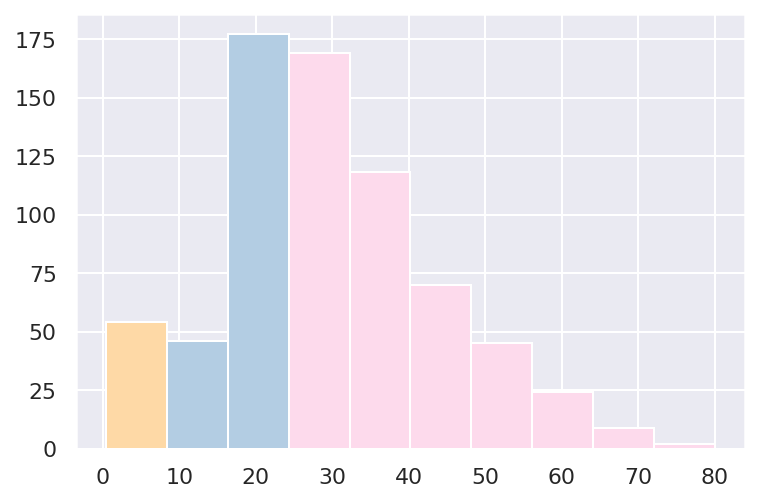

In [11]:
# set the colors
cmap = plt.get_cmap('Pastel1')
young = cmap(0.5)
middle = cmap(0.2)
older = cmap(0.8)

# get the object we will change - patches is an array with len: num of bins
fig, ax = plt.subplots()
y_values, bins, patches = ax.hist(titanic.age, 10)

[patches[i].set_facecolor(young) for i in range(0,1)] # bin 0
[patches[i].set_facecolor(middle) for i in range(1,3)] # bins 1 and 2
[patches[i].set_facecolor(older) for i in range(3,10)] # 7 remaining bins 

ax.grid(True)
fig.show()

#### Kernel Density Estimation
The kernel density estimate can be a useful tool for plotting the shape of a distribution. The **bandwidth (bw)** parameter of the KDE controls how tightly the estimation is fit to the data, much like the bin size in a histogram. It corresponds to the width of the kernels we plotted above. The default behavior tries to guess a good value using a common reference rule, but it may be helpful to try larger or smaller values.

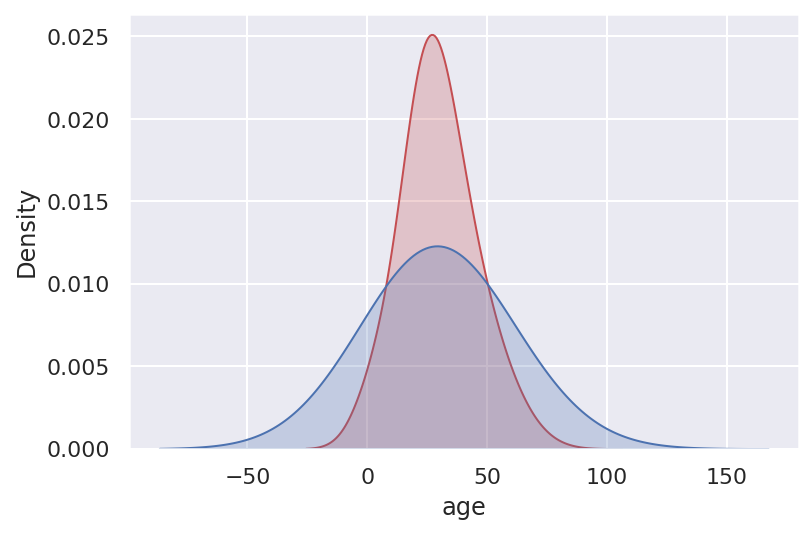

In [12]:
sns.kdeplot(titanic.age, bw=0.6, label="bw: 0.6", shade=True, color="r");
sns.kdeplot(titanic.age, bw=2, label="bw: 2", shade=True);

<div class='exercise'> <b> Exercise:  Plot the distribution of fare paid by passengers </div>

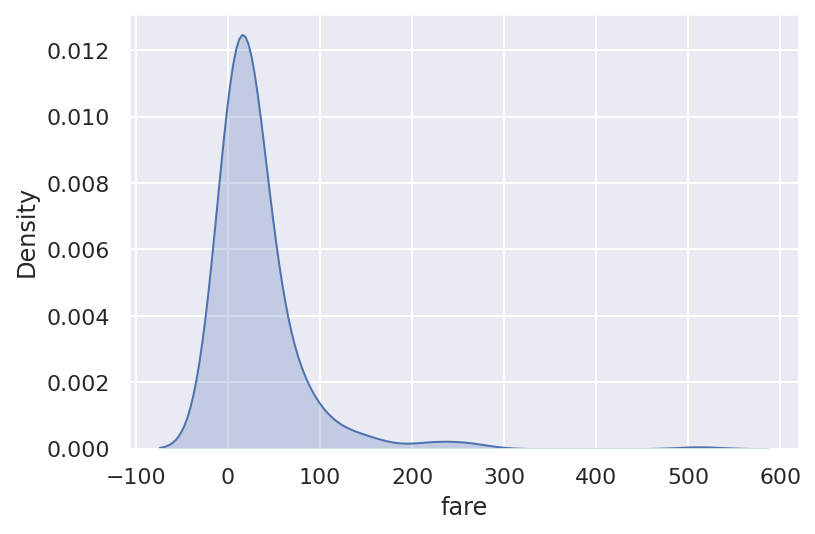

In [13]:
# your code here
sns.kdeplot(titanic.fare, bw=0.5, label="bw: 0.5", shade=True);

#### You can mix elements of `matplotlib` such as Axes with `seaborn` elements for a best use of both worlds.

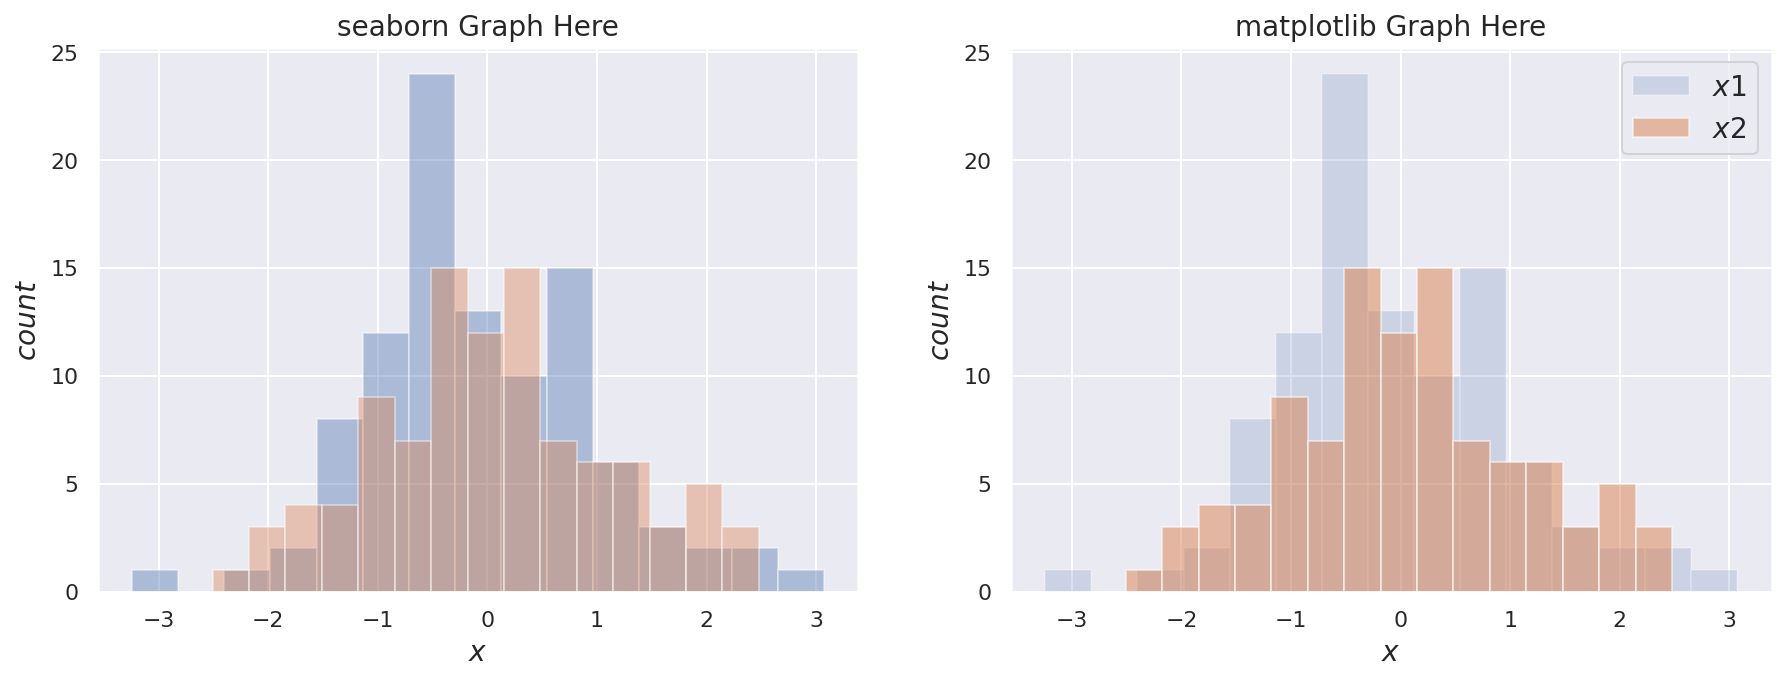

In [14]:
import seaborn as sns
sns.set(color_codes=True)

x1 = np.random.normal(size=100)
x2 = np.random.normal(size=100)

fig, ax = plt.subplots(1,2, figsize=(15,5))

# seaborn goes in first subplot
sns.set(font_scale=0.5)
sns.distplot(x1, kde=False, bins=15, ax=ax[0]);
sns.distplot(x2, kde=False, bins=15, ax=ax[0]);
ax[0].set_title('seaborn Graph Here', fontsize=14)
ax[0].set_xlabel(r'$x$', fontsize=14)
ax[0].set_ylabel(r'$count$', fontsize=14)

# matplotlib goes in second subplot
ax[1].hist(x1, alpha=0.2, bins=15, label=r'$x1$');
ax[1].hist(x2, alpha=0.5, bins=15, label=r'$x2$');
ax[1].set_xlabel(r'$x$', fontsize=14)
ax[1].set_ylabel(r'$count$', fontsize=14)
ax[1].set_title('matplotlib Graph Here', fontsize=14)
ax[1].legend(loc='best', fontsize=14);

#### Introduding the heart disease dataset. 

More on this in the in-class exercise at the end of the notebook. 

In [47]:
columns = ["age", "sex", "cp", "restbp", "chol", "fbs", "restecg", 
           "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"]
heart_df = pd.read_csv('https://raw.githubusercontent.com/harinyadevi/Machine-Learning/main/heart_disease.csv', header=None, names=columns)

heart_df.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
2,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
3,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
4,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1


### Boxplots

#### One variable.

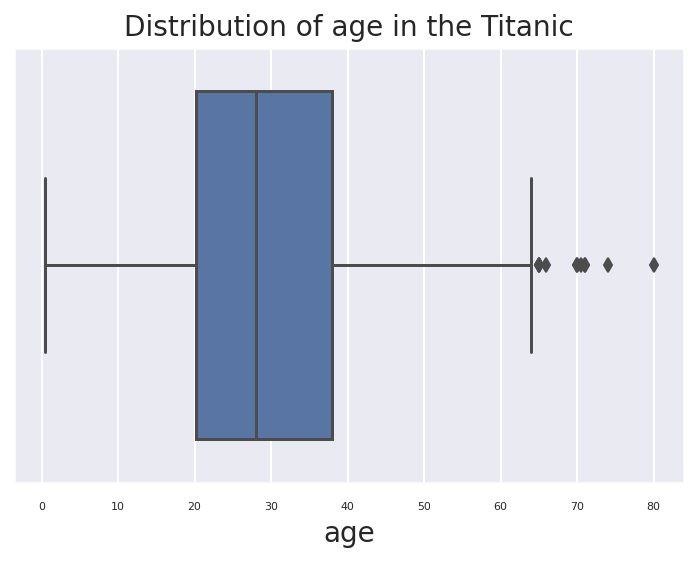

In [16]:
# seaborn
ax = sns.boxplot(x='age', data=titanic)
#ax = sns.boxplot(x=titanic['age']) # another way to write this
ax.set_ylabel(None);
ax.set_xlabel('age', fontsize=14);
ax.set_title('Distribution of age in the Titanic', fontsize=14);

#### Two variables

<div class='exercise'> <b> Exercise:  Did more young people or older ones get first class tickets on the Titanic?</div>

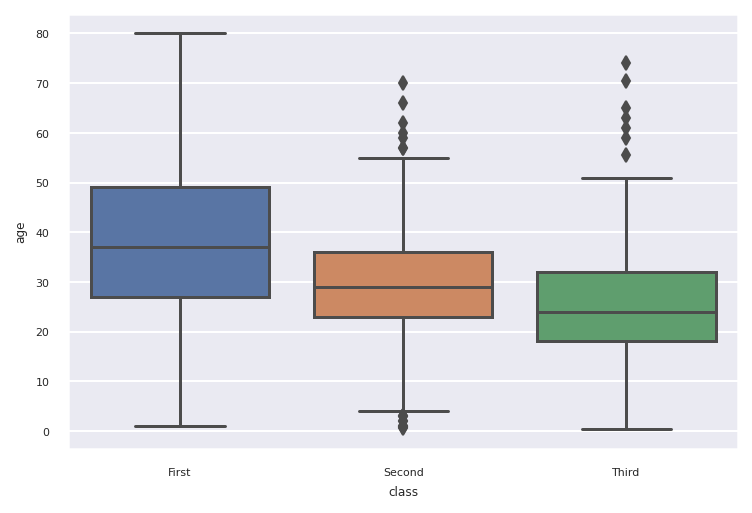

In [17]:
# your code here
# two variables seaborn
ax = sns.boxplot(x='class', y='age', data=titanic)

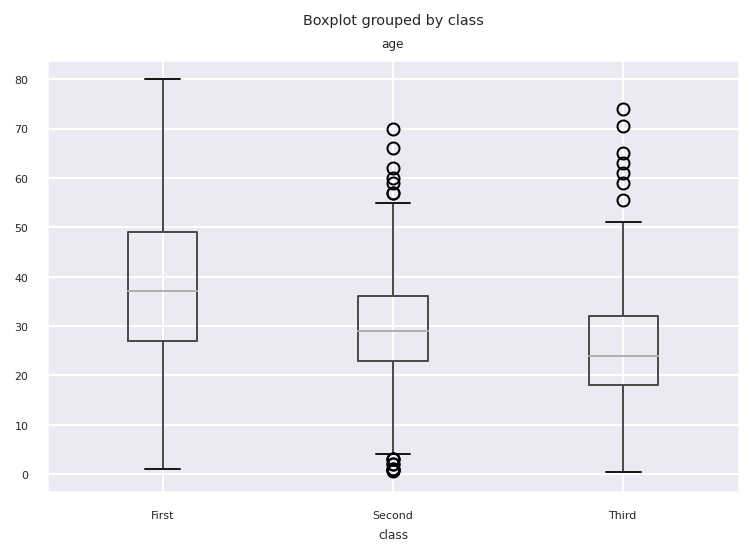

In [19]:
# two variable boxplot in pandas
titanic.boxplot('age',by='class')

### Scatterplots

#### Plotting the distribution of two variables

Also called a bivariate distribution where each observation is shown with  a point with x and y values. You can draw a scatterplot with the `matplotlib plt.scatter` function, or the `seaborn jointplot()` function:

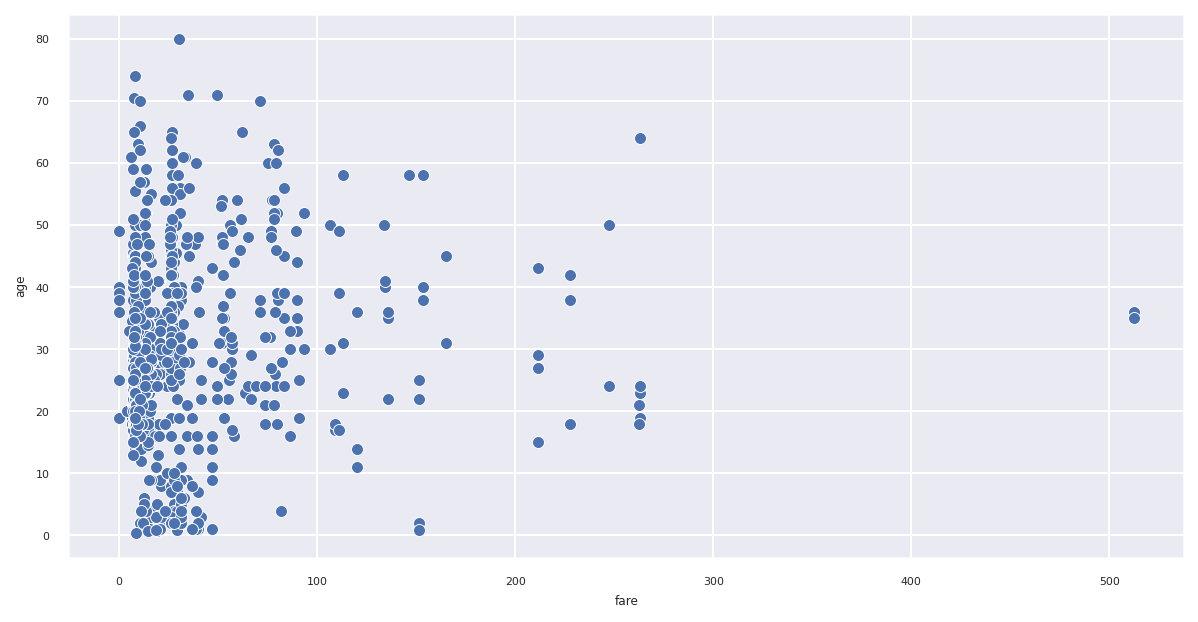

In [20]:
f, ax = plt.subplots(1,1, figsize=(10, 5))
sns.scatterplot(x="fare", y="age", data=titanic, ax=ax); 

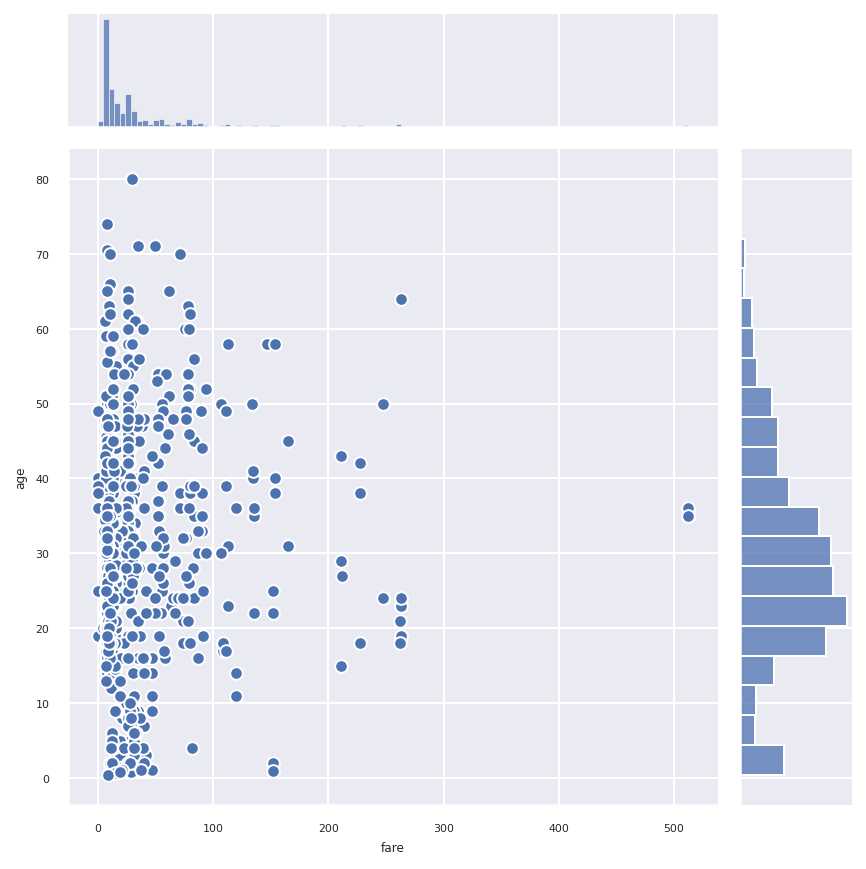

In [21]:
sns.jointplot("fare", "age", data=titanic, s=40, edgecolor="w", linewidth=1)

You may control the `seaborn` [Figure aesthetics](https://seaborn.pydata.org/tutorial/aesthetics.html).

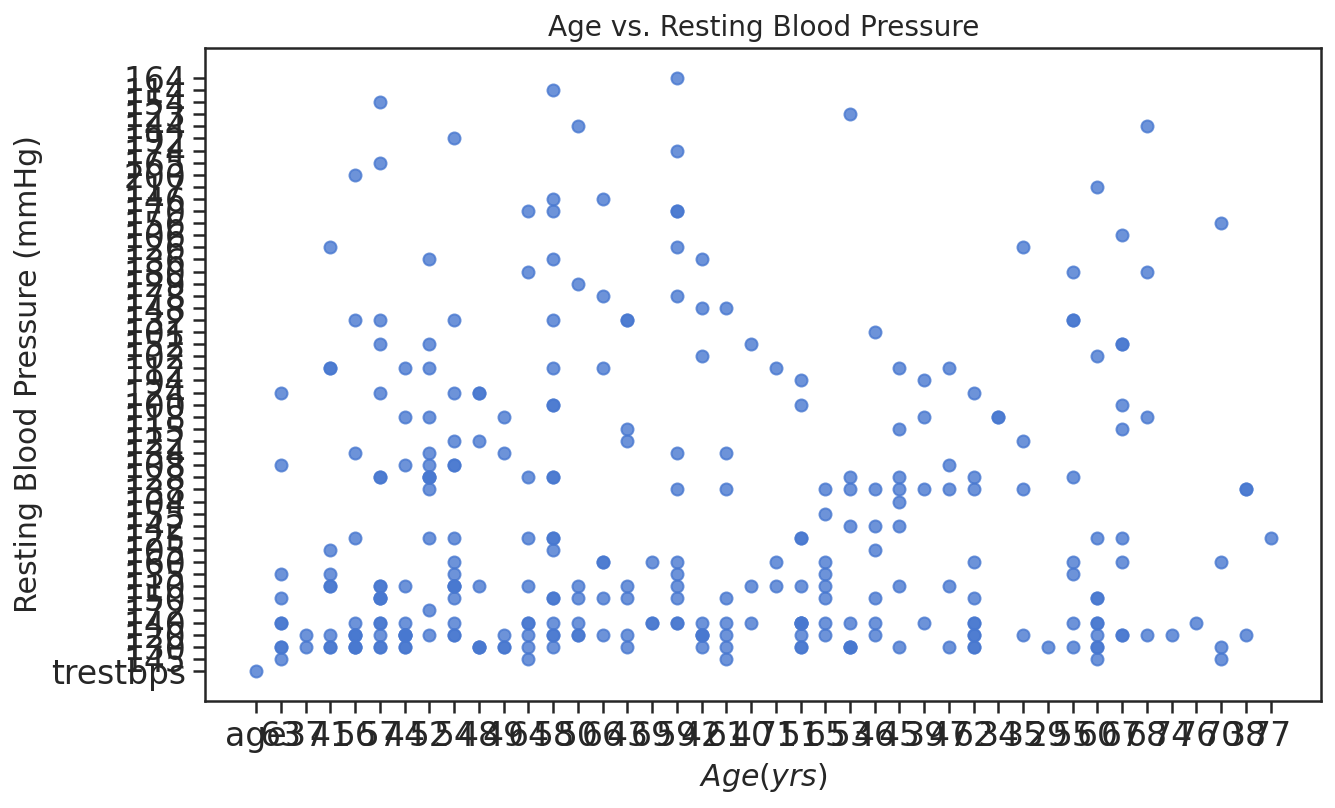

In [48]:
# matplotlib
fig, ax = plt.subplots(1,1, figsize=(10,6))
ax.scatter(heart_df['age'], heart_df['restbp'], alpha=0.8);
ax.set_xlabel(r'$Age (yrs)$', fontsize=15);
ax.set_ylabel(r'Resting Blood Pressure (mmHg)', fontsize=15);
ax.set_title('Age vs. Resting Blood Pressure', fontsize=14)
plt.show();

#### Plotting the distribution of three variables

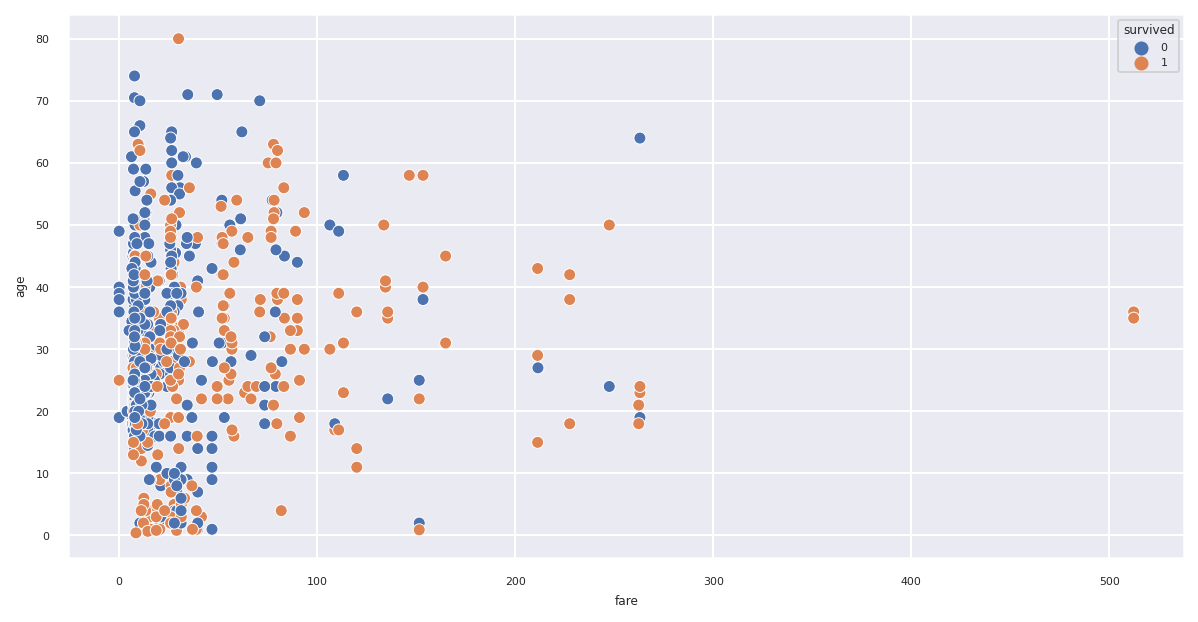

In [23]:
f, ax = plt.subplots(1,1, figsize=(10, 5))
sns.scatterplot(x="fare", y="age", hue="survived", data=titanic, ax=ax);

#### Plotting the distribution of four variables (going too far?)

<div class='exercise'> <b> Exercise:  Plot the distribution of fare paid by passengers according to age, survival and sex. </div>
    
Use `size=` for the fourth variable

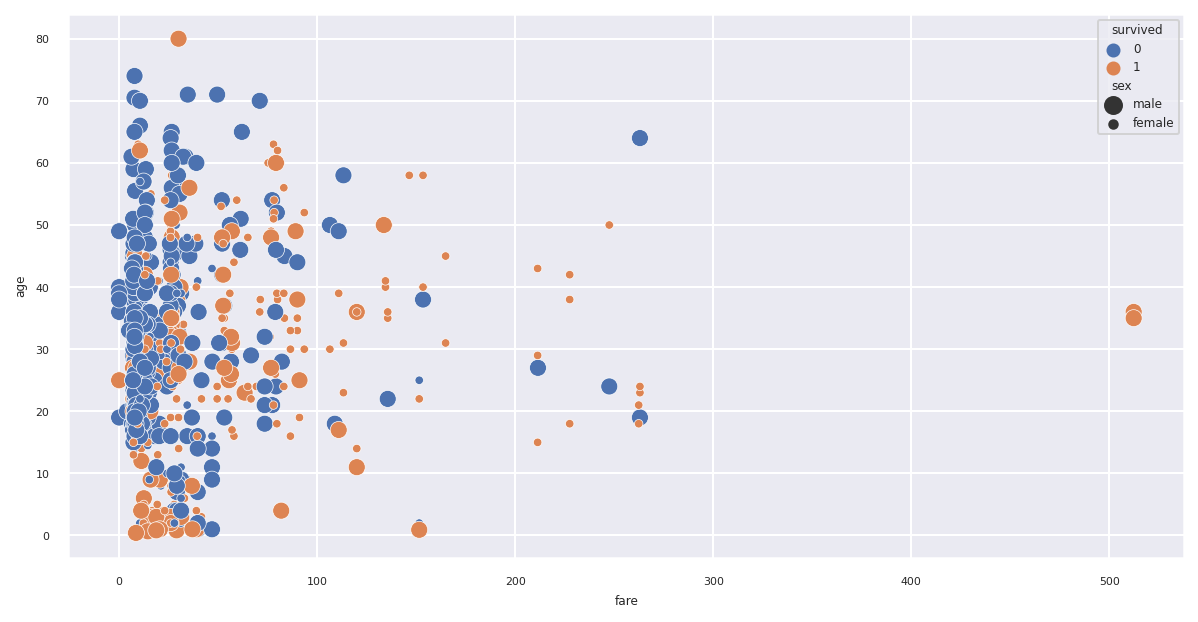

In [24]:
# your code here
f, ax = plt.subplots(1,1, figsize=(10, 5))
sns.scatterplot(x="fare", y="age", hue="survived", size="sex", data=titanic, ax=ax);

### Pairplots

In [25]:
titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'class', 'deck'], dtype='object')

In [26]:
to_plot = ['age', 'fare', 'survived', 'deck']

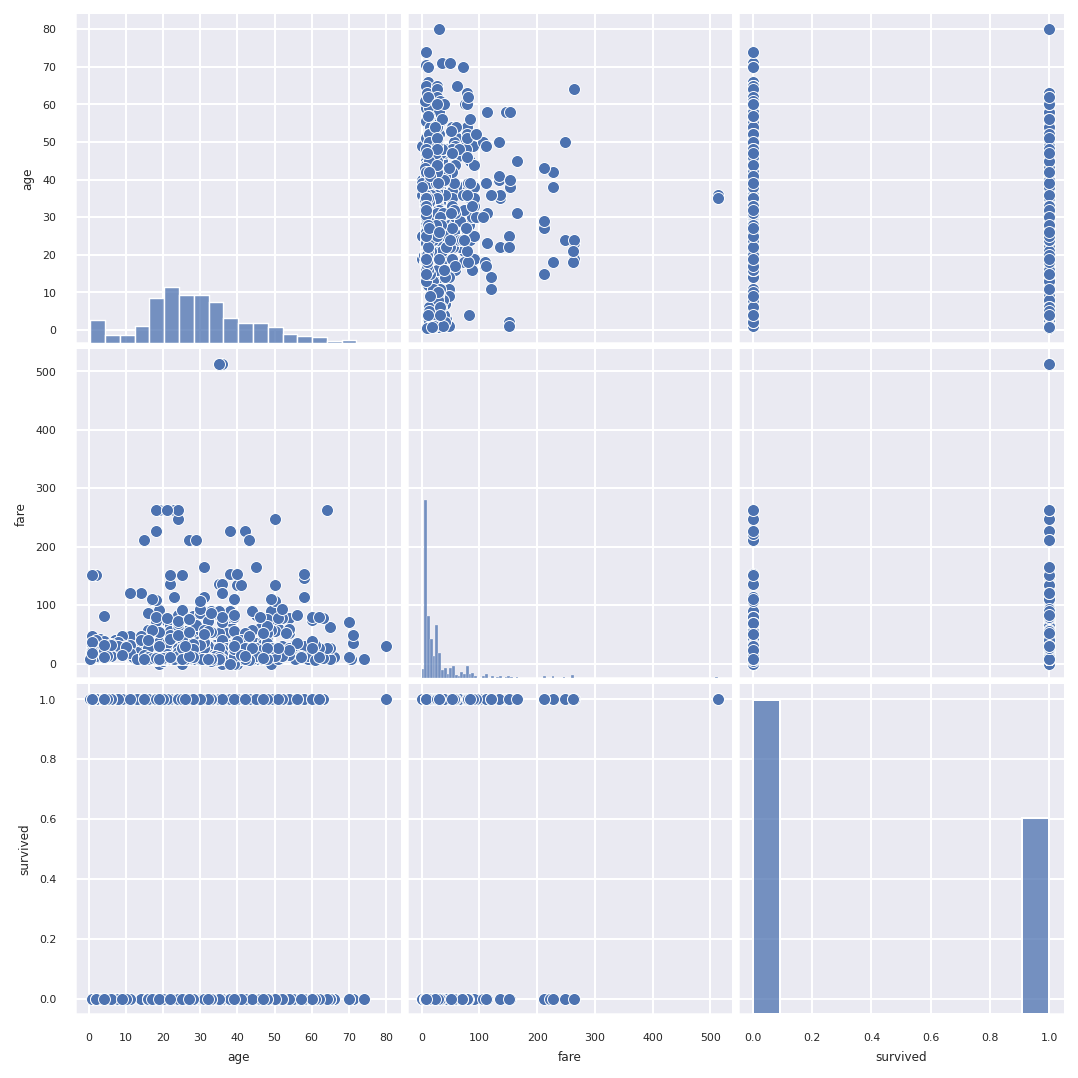

In [27]:
df_to_plot = titanic.loc[:,to_plot]
sns.pairplot(df_to_plot);

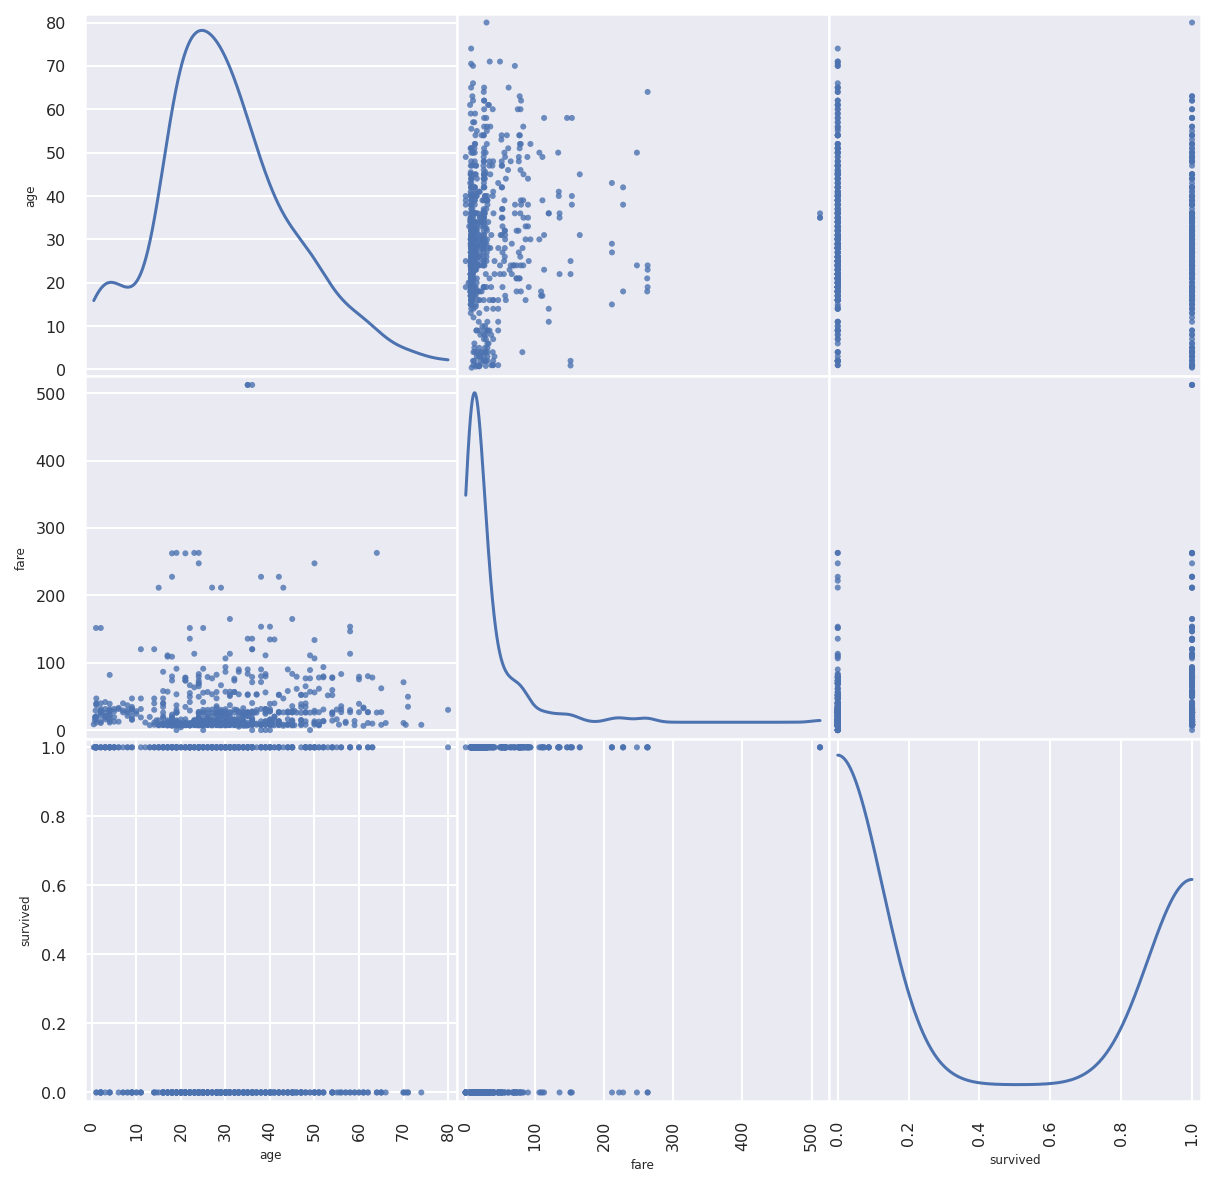

In [28]:
from pandas.plotting import scatter_matrix
scatter_matrix(df_to_plot, alpha=0.8, figsize=(10, 10), diagonal='kde');

### Plotting Categorical Variables

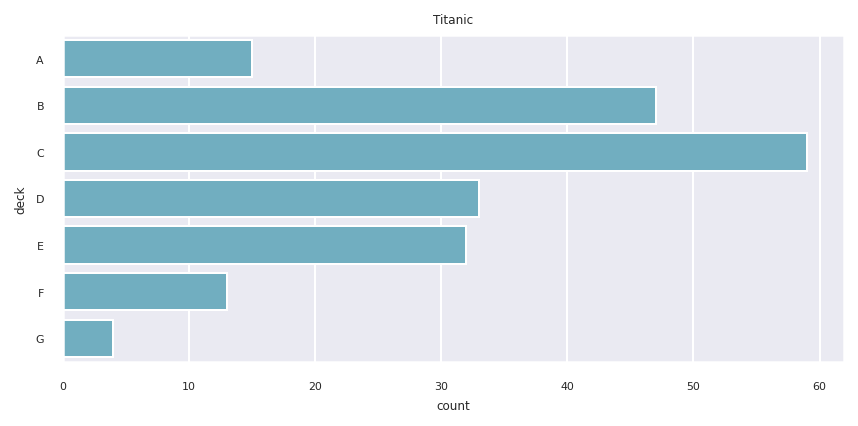

In [29]:
import seaborn as sns
titanic = sns.load_dataset('titanic')
f, ax = plt.subplots(figsize=(7, 3));
ax = sns.countplot(y="deck", data=titanic, color="c");
ax.set_title('Titanic');

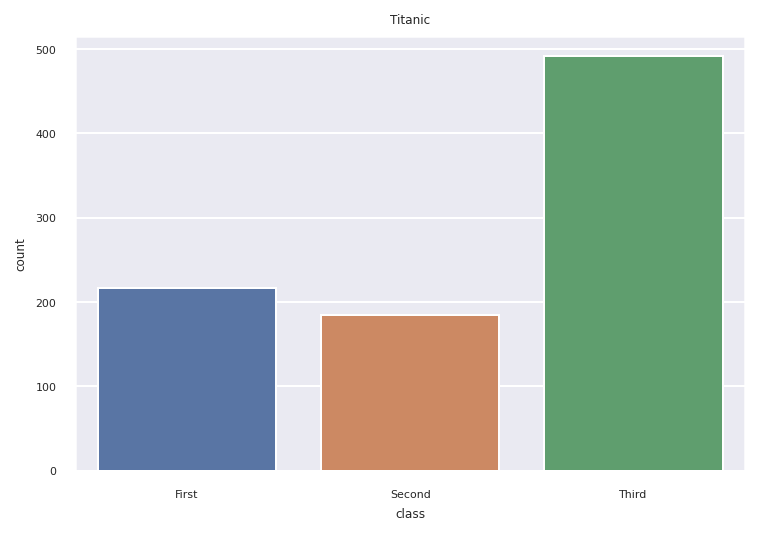

In [30]:
ax = sns.countplot(x="class", data=titanic)
ax.set_title('Titanic');

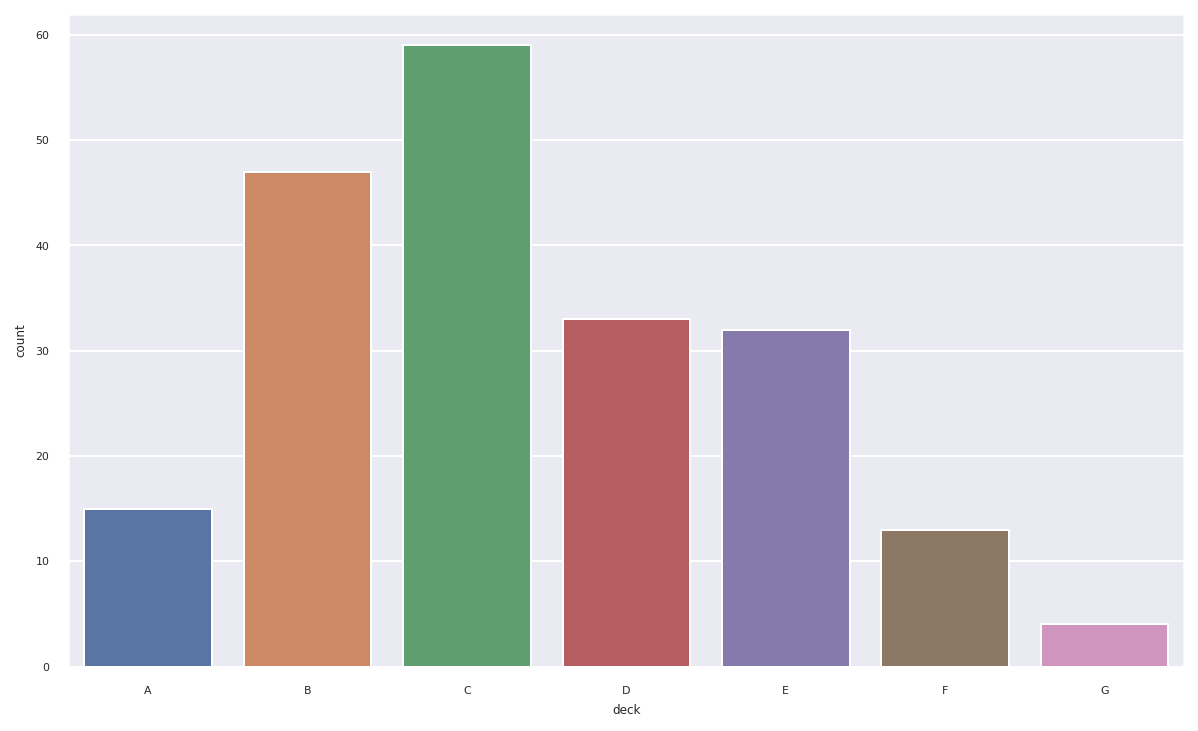

In [31]:
fig, ax = plt.subplots(figsize=(10,6)) # Create figure object
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2.5})
ax = sns.countplot(x="deck", data=titanic)

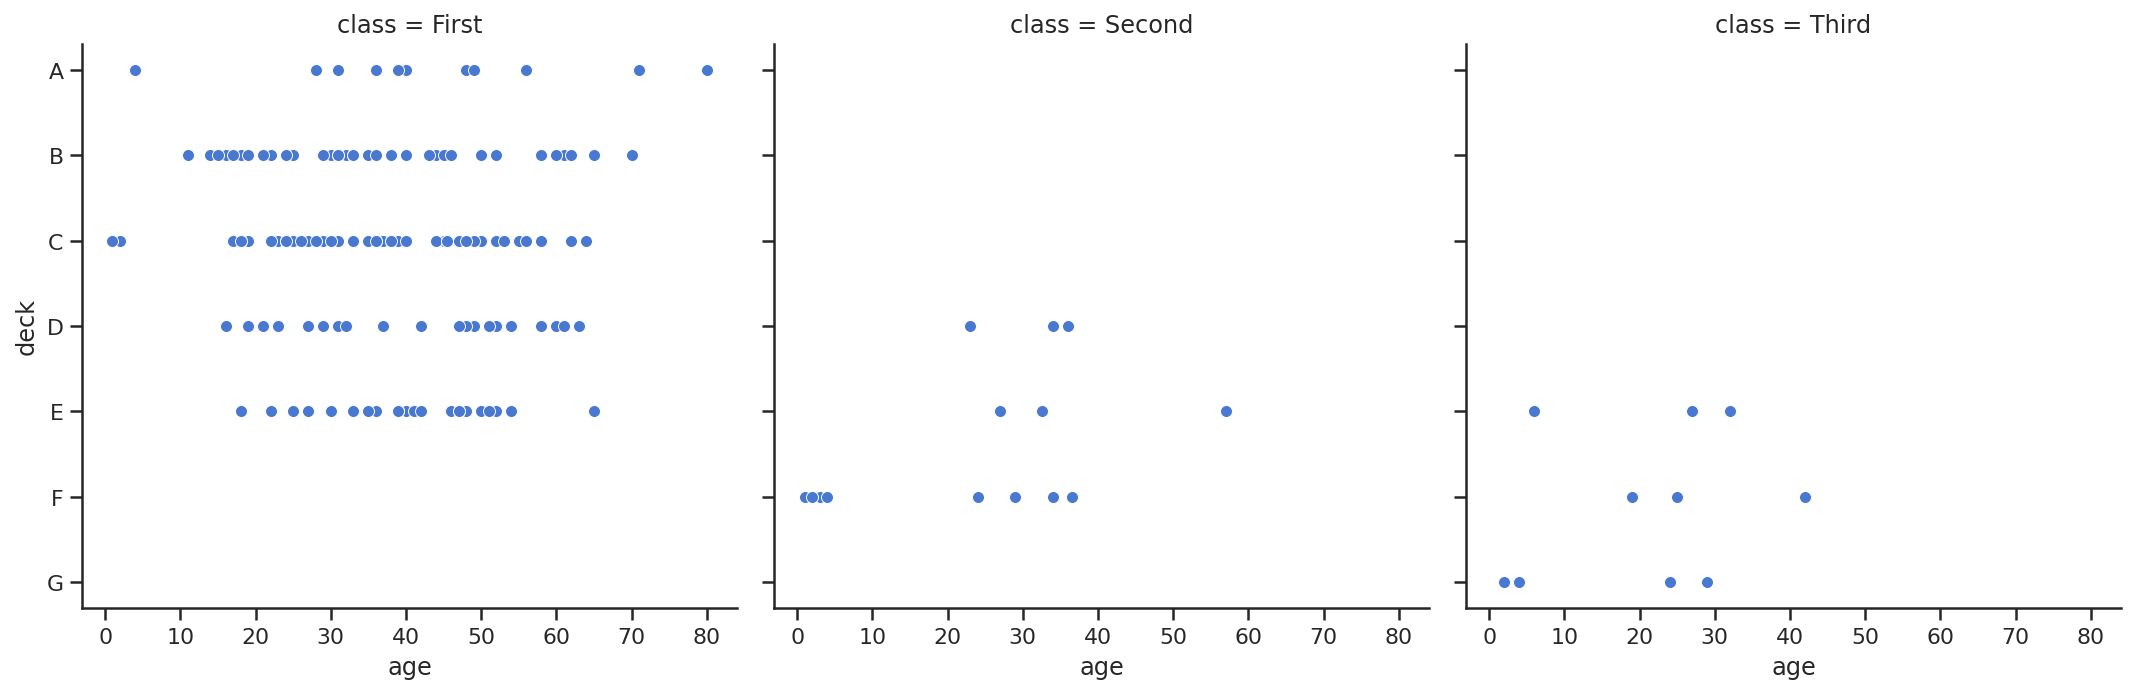

In [32]:
sns.set(style="ticks", palette="muted")
sns.relplot(x="age", y="deck", col="class", data=titanic);

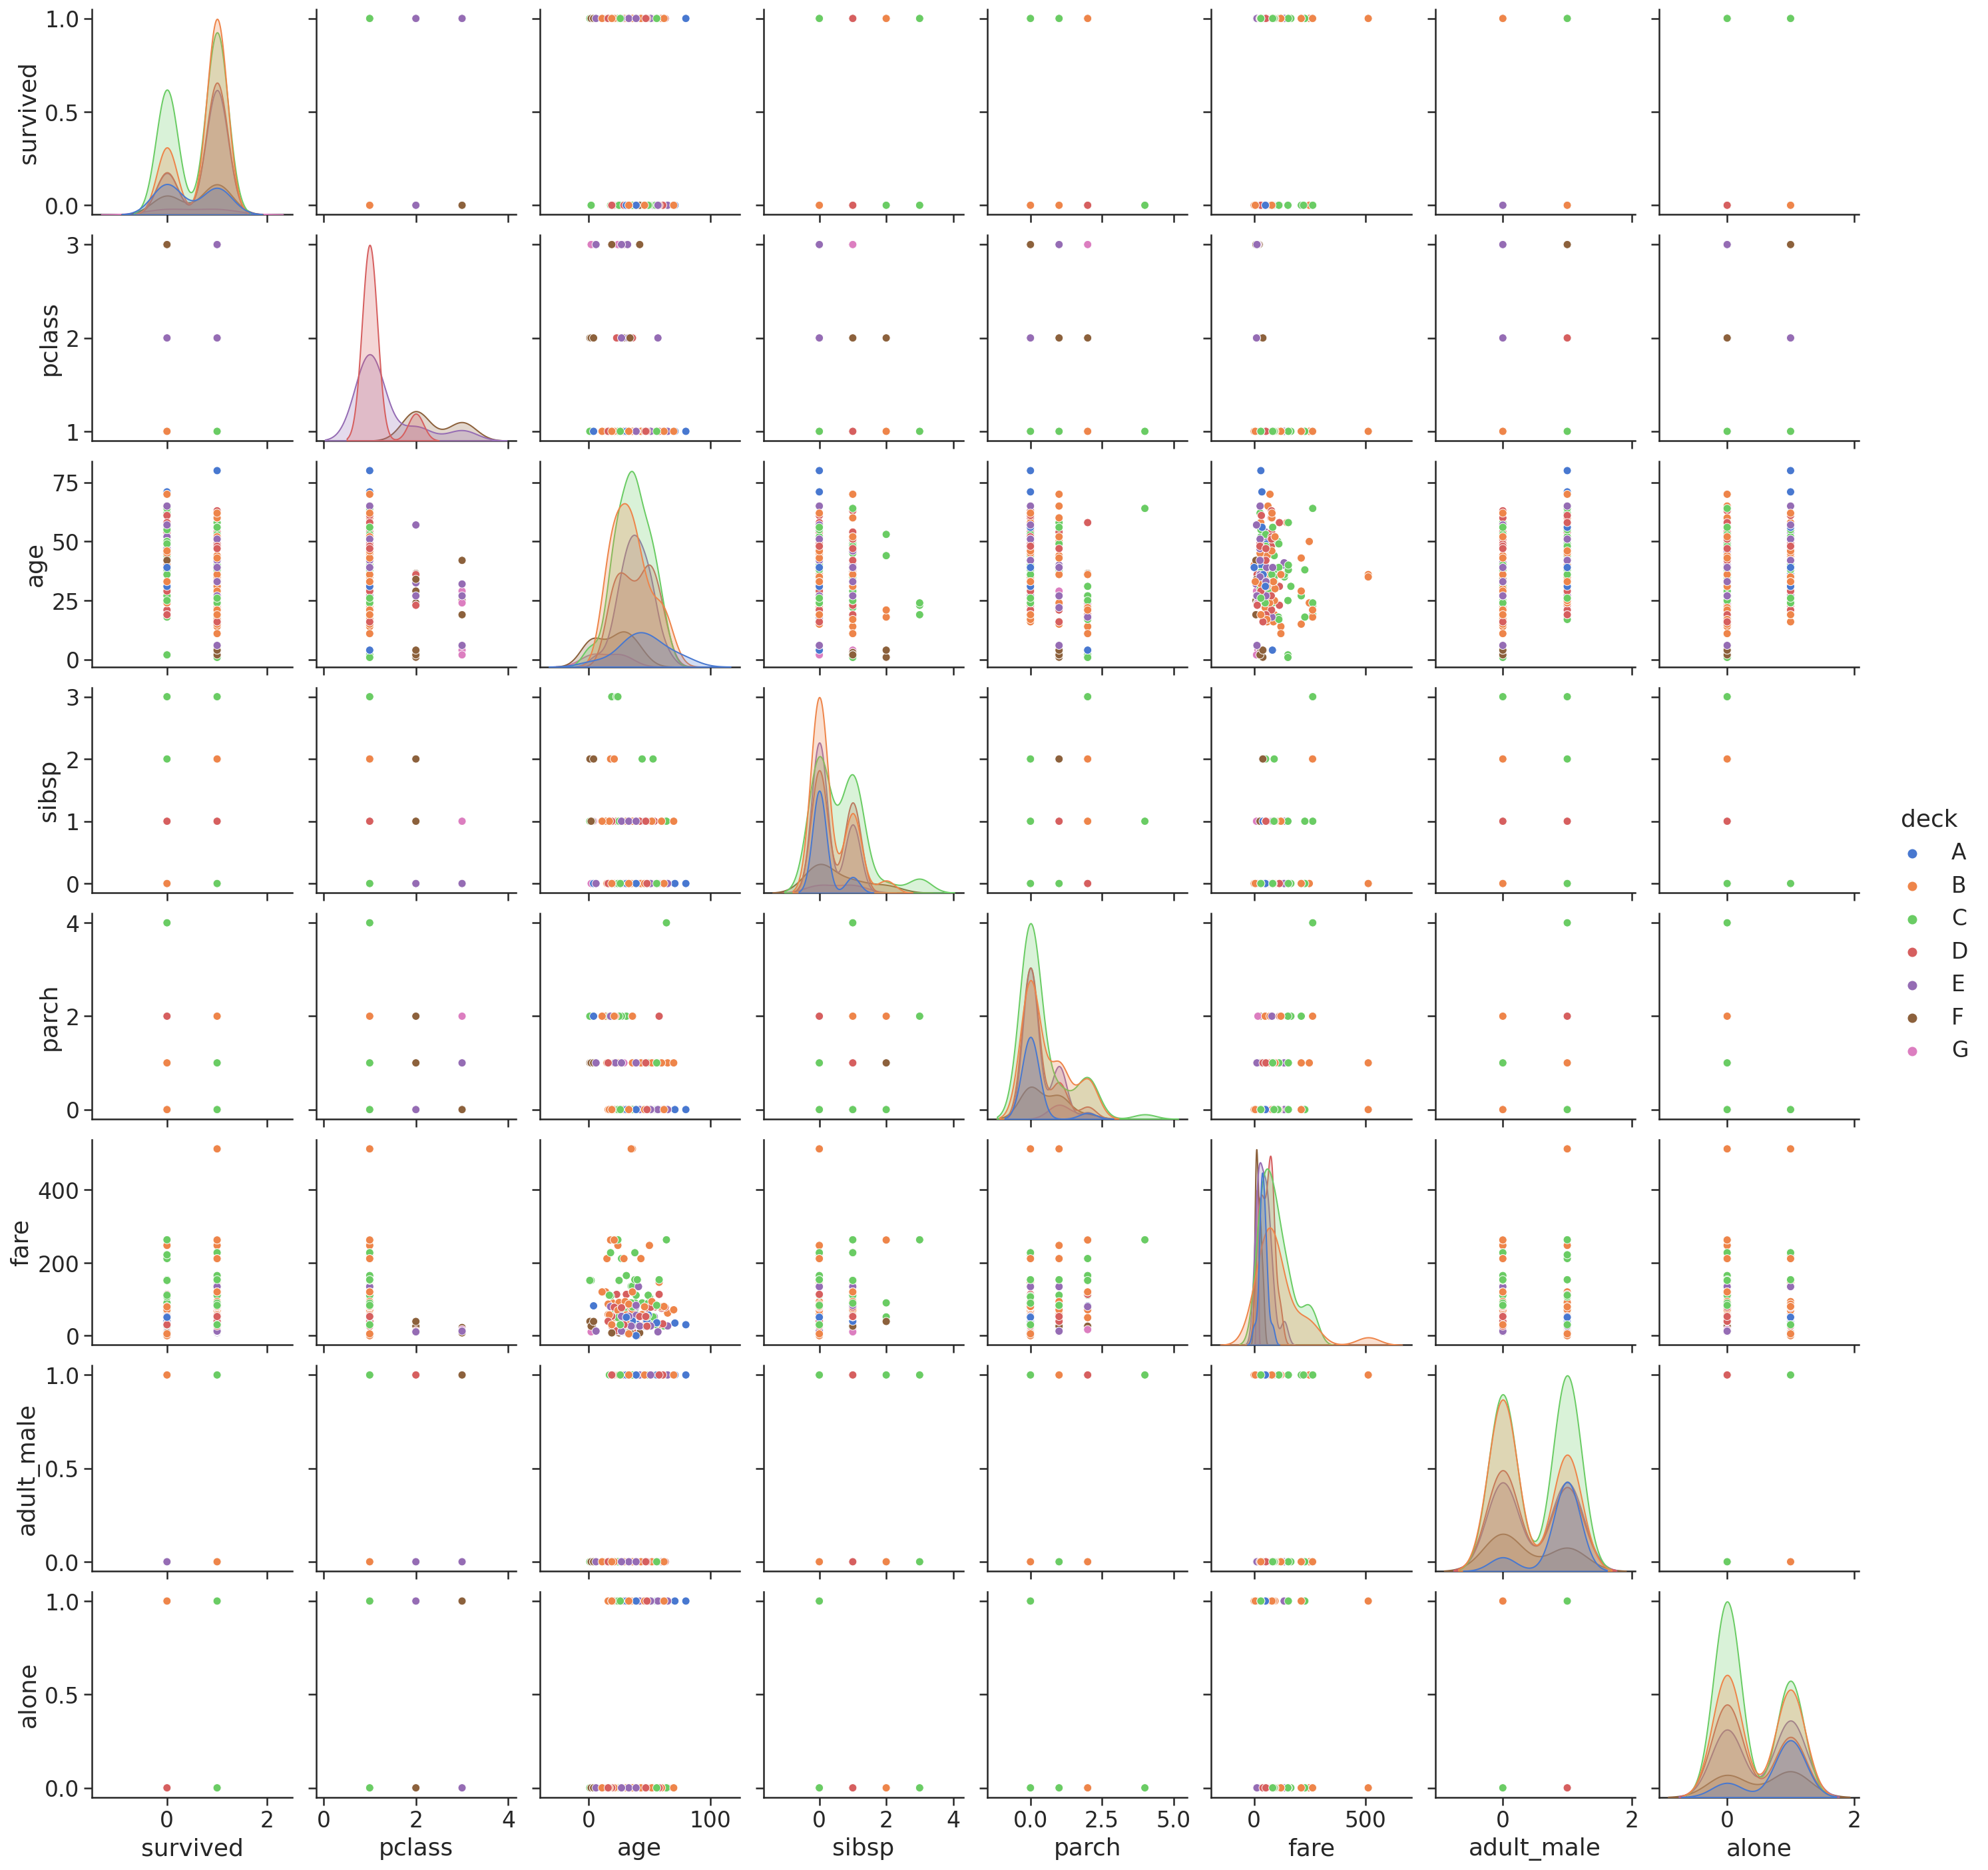

In [33]:
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.pairplot(data=titanic, hue="deck");

### Introduction to `pandas` plotting.

There is plotting functionality built in `pandas`. Look for it in the `pandas` "encyclopedia", a mere 2883-page pdf from the creator Wes McKinney: [pandas documentation (pdf)](https://pandas.pydata.org/pandas-docs/stable/pandas.pdf) 

**Example:** The `value_counts()` Series method and top-level function computes a histogram of a 1D array of values. It can
also be used as a function on regular arrays.

Reminder: DataFrame: “index” (axis=0, default), “columns” (axis=1) 

### Line Graph

#### Good for time dependency or when a variable evolves

In [34]:
df = pd.DataFrame(np.random.randn(1000, 4), columns=['A', 'B', 'C', 'D'])
df.head()

,A,B,C,D
0,0.300333,-2.460188,-0.554040,1.066624
1,1.374538,1.464297,-1.105005,1.944310
2,-0.115370,2.117392,0.752288,0.678652
3,0.202759,0.316887,-1.538835,-1.752127
4,0.045111,-2.281570,2.329751,0.033886


In [35]:
# cumulative sum adds column values as it goes
df = df.cumsum()
df.head()

,A,B,C,D
0,0.300333,-2.460188,-0.554040,1.066624
1,1.674871,-0.995891,-1.659044,3.010934
2,1.559500,1.121501,-0.906756,3.689586
3,1.762259,1.438388,-2.445591,1.937459
4,1.807370,-0.843183,-0.115840,1.971345


<Figure size 432x288 with 0 Axes>

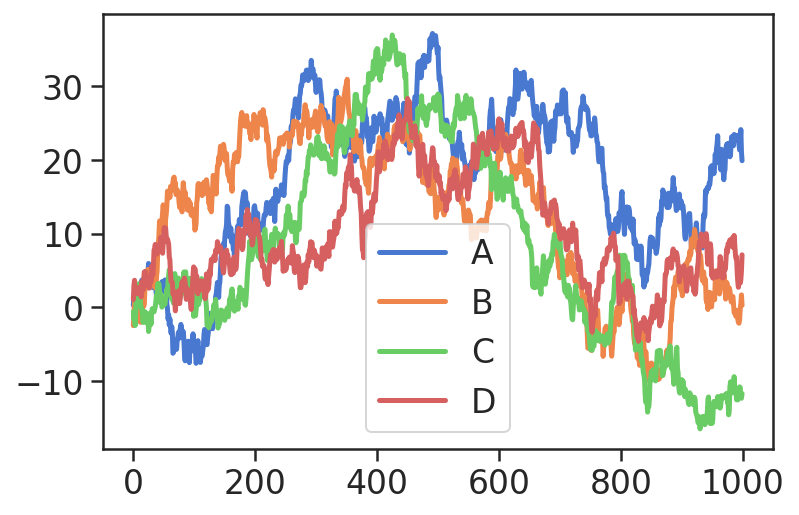

In [36]:
plt.figure();
df.plot();
plt.legend(loc='best');

<Figure size 432x288 with 0 Axes>

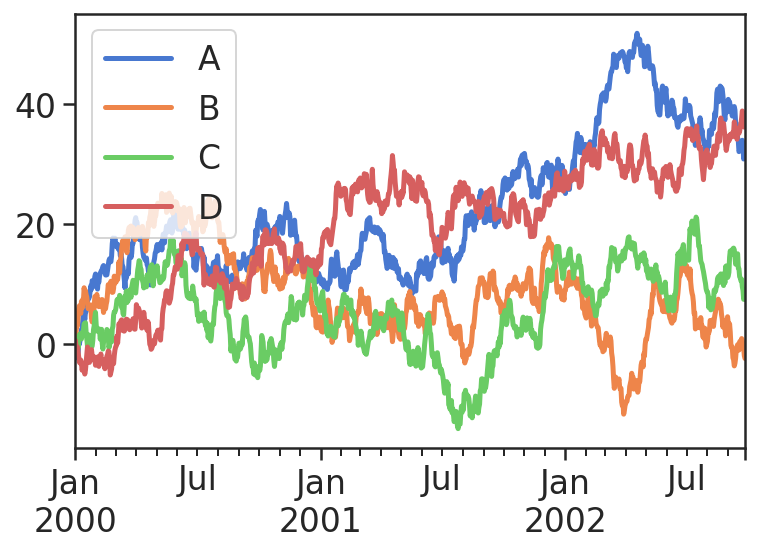

In [37]:
ts = pd.Series(np.random.randn(1000),
               index=pd.date_range('1/1/2000', periods=1000))
df = pd.DataFrame(np.random.randn(1000, 4), 
                  index=ts.index, columns=list('ABCD'))

df = df.cumsum()
plt.figure();
df.plot();

Plotting methods allow for a handful of plot styles other than the default line plot. These methods can be provided as the kind keyword argument to plot(), and include:

- ‘bar’ or ‘barh’ for bar plots
- ‘hist’ for histogram
- ‘box’ for boxplot
- ‘kde’ or ‘density’ for density plots
- ‘area’ for area plots
- ‘scatter’ for scatter plots
- ‘hexbin’ for hexagonal bin plots
- ‘pie’ for pie plots

In addition to these kind s, there are the `DataFrame.hist()`, and `DataFrame.boxplot()` methods, which use a separate interface. `scatter_matrix` in pandas.plotting takes a Series or DataFrame as an argument.

### Bar Plots

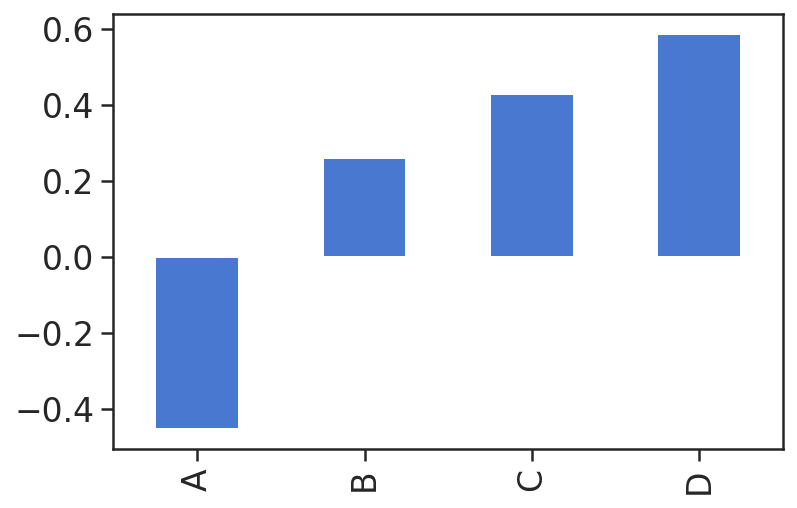

In [38]:
plt.figure();
df.iloc[0].plot(kind='bar');

In [39]:
df2 = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])
df2

,a,b,c,d
0,0.945556,0.068701,0.142121,0.954409
1,0.584761,0.656739,0.400870,0.697999
2,0.999717,0.837778,0.883830,0.247220
3,0.598976,0.491206,0.163056,0.127590
4,0.828108,0.415626,0.655364,0.731813
5,0.051952,0.139486,0.733722,0.522045
6,0.262786,0.265494,0.436847,0.604583
7,0.622564,0.380502,0.517428,0.665562
8,0.735310,0.383289,0.683487,0.877865
9,0.297600,0.565323,0.520468,0.150971


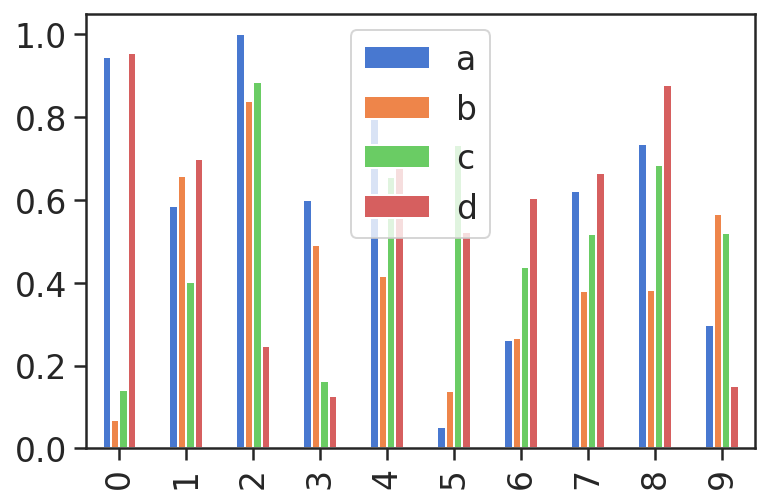

In [40]:
df2.plot.bar();

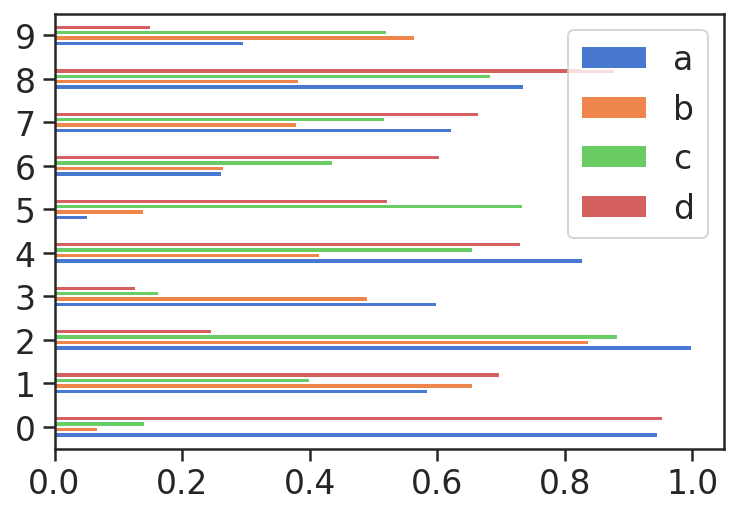

In [41]:
# horizontal bar plot
df2.plot.barh(stacked=False);

### Histograms

<Figure size 432x288 with 0 Axes>

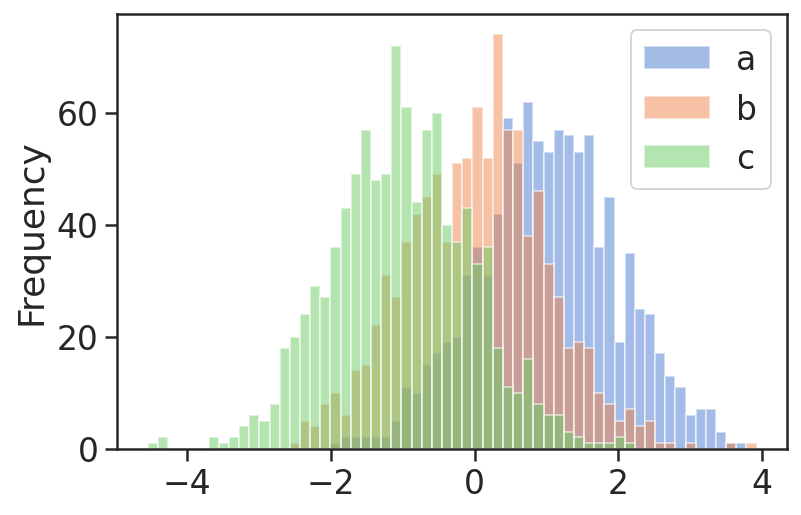

In [42]:
df4 = pd.DataFrame({'a': np.random.randn(1000) + 1, 'b': np.random.randn(1000), 
                    'c': np.random.randn(1000) - 1}, columns=['a', 'b', 'c'])

plt.figure();
df4.plot.hist(alpha=0.5, stacked=False, bins=60);

### Boxplots

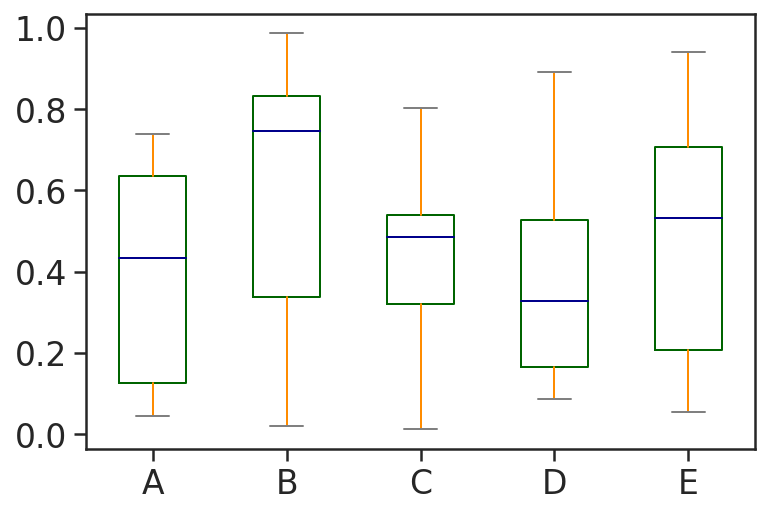

In [43]:
color = {'boxes': 'DarkGreen', 'whiskers': 'DarkOrange',
         'medians': 'DarkBlue', 'caps': 'Gray'}

df = pd.DataFrame(np.random.rand(10, 5), columns=['A', 'B', 'C', 'D', 'E'])
df.plot.box(color=color );

### Area plots

You can create area plots with `Series.plot.area()` and `DataFrame.plot.area()`. Area plots are stacked
by default. To produce stacked area plot, each column must be either all positive or all negative values.

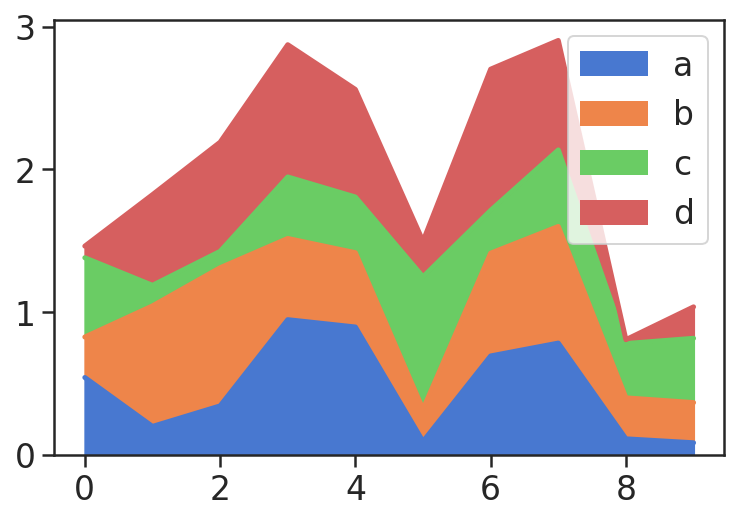

In [44]:
df = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])
df.plot.area(stacked=True);

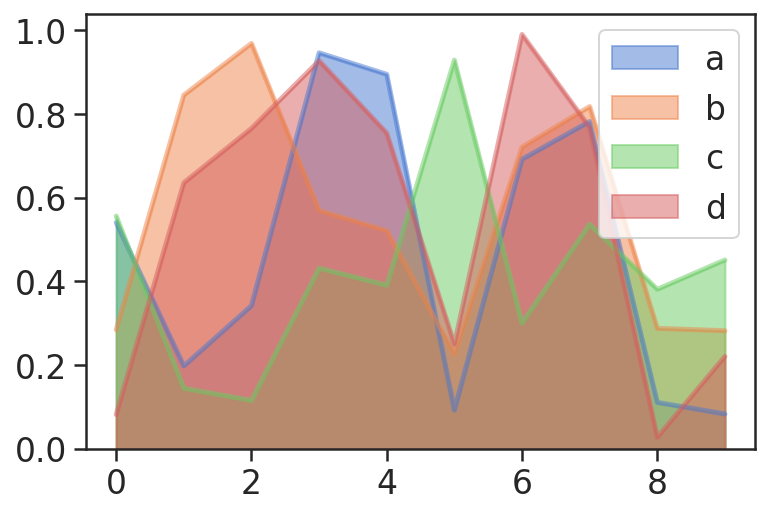

In [45]:
df.plot.area(stacked=False);

### Scatterplot

Scatter plot can be drawn by using the DataFrame.plot.scatter() method. Scatter plot requires numeric
columns for the x and y axes. These can be specified by the x and y keywords.

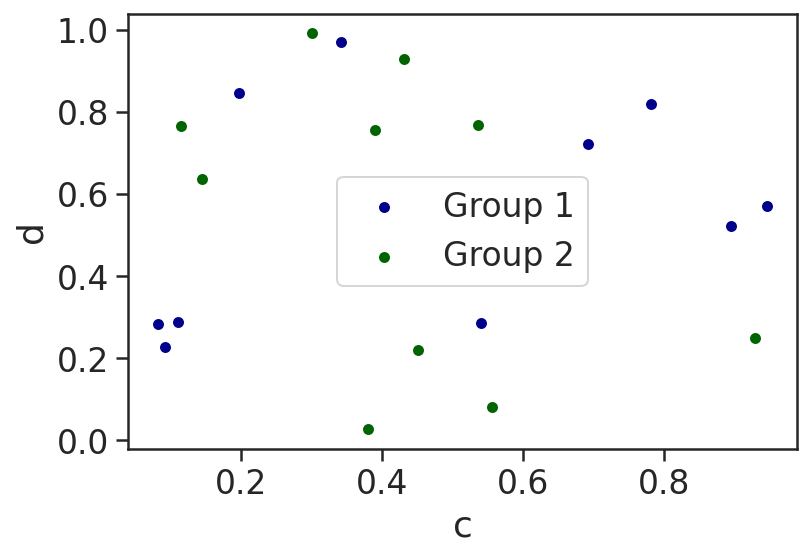

In [46]:
ax = df.plot.scatter(x='a', y='b', color='DarkBlue', label='Group 1');
df.plot.scatter(x='c', y='d', color='DarkGreen', label='Group 2', ax=ax);

### `pandas` Tricks

The copy() method on pandas objects copies the underlying data (though not the axis indexes, since they are immutable)
and returns a new object. Note that it is seldom necessary to copy objects. For example, there are only a
handful of ways to alter a DataFrame in-place:

- Inserting, deleting, or modifying a column.
- Assigning to the index or columns attributes.
- For homogeneous data, directly modifying the values via the values attribute or advanced indexing.

To be clear, no pandas method has the side effect of modifying your data; almost every method returns a new object,
leaving the original object untouched. If the data is modified, it is because you did so explicitly